<a href="https://colab.research.google.com/github/dian3778/covid/blob/main/diana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest Data

In [ ]:
!mkdir diana

In [ ]:
import os
os.chdir('diana')

In [ ]:
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
!wget -O covid.csv 'https://covid19.who.int/WHO-COVID-19-global-data.csv'

--2023-11-28 15:49:15--  https://covid19.who.int/WHO-COVID-19-global-data.csv
Resolving covid19.who.int (covid19.who.int)... 3.162.163.8, 3.162.163.64, 3.162.163.69, ...
Connecting to covid19.who.int (covid19.who.int)|3.162.163.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15331295 (15M) [text/csv]
Saving to: ‘covid.csv’

covid.csv           100%[===================>]  14.62M  92.2MB/s    in 0.2s    

2023-11-28 15:49:15 (92.2 MB/s) - ‘covid.csv’ saved [15331295/15331295]



In [ ]:
import pandas as pd
df1 = pd.read_csv('covid.csv')


# Pre-process data

In [ ]:
df1.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [ ]:
features=['Cumulative_cases','Cumulative_deaths','Country_code']
df1=df1[features]

In [ ]:
df1 = df1.rename(columns={"Cumulative_cases":"total","Cumulative_deaths":"deaths"})
df1

,total,deaths,Country_code
0,0,0,AF
1,0,0,AF
2,0,0,AF
3,0,0,AF
4,0,0,AF
...,...,...,...
336535,265890,5725,ZW
336536,265890,5725,ZW
336537,265890,5725,ZW
336538,265890,5725,ZW


In [ ]:
df1['Country_code'].unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

In [ ]:
df1 = df1.loc[df1['Country_code'] == 'KE']
df1

,total,deaths,Country_code
154780,0,0,KE
154781,0,0,KE
154782,0,0,KE
154783,0,0,KE
154784,0,0,KE
...,...,...,...
156195,344077,5689,KE
156196,344077,5689,KE
156197,344077,5689,KE
156198,344077,5689,KE


In [ ]:
df1 = df1.loc[df1['total'] != 0]
df1

,total,deaths,Country_code
154851,1,0,KE
154852,1,0,KE
154853,3,0,KE
154854,3,0,KE
154855,4,0,KE
...,...,...,...
156195,344077,5689,KE
156196,344077,5689,KE
156197,344077,5689,KE
156198,344077,5689,KE


In [ ]:
df1['recoveries'] = df1['total'] - df1['deaths']


<ipython-input-69-5c41e55f614f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['recoveries'] = df1['total'] - df1['deaths']


In [ ]:
df1

,total,deaths,Country_code,recoveries
154851,1,0,KE,1
154852,1,0,KE,1
154853,3,0,KE,3
154854,3,0,KE,3
154855,4,0,KE,4
...,...,...,...,...
156195,344077,5689,KE,338388
156196,344077,5689,KE,338388
156197,344077,5689,KE,338388
156198,344077,5689,KE,338388


# Model work

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
x_values = df1.recoveries
y_values = df1.deaths

X_train,X_test,y_train,y_test = train_test_split(x_values,y_values)

In [ ]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

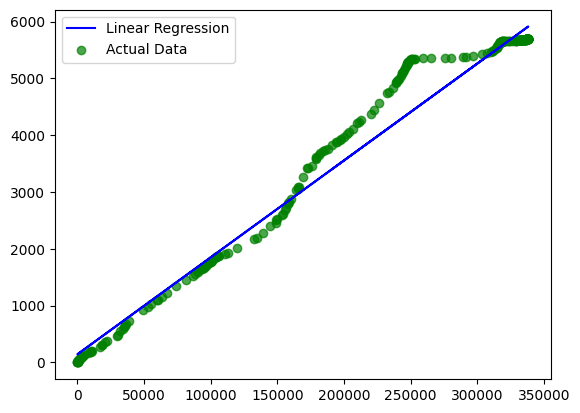

In [ ]:
prediction = model.predict(X_test.values.reshape(-1,1))

plt.plot(X_test,prediction,label='Linear Regression',color='b')
plt.scatter(X_test,y_test,label='Actual Data',color='g',alpha=.7)
plt.legend()
plt.show()

In [ ]:
model.score(X_test.values.reshape(-1,1),y_test.values)

0.9747406773801115